# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [421]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [422]:
# My Cell

mouse_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [423]:
# Renaming comuns for ease of coding

mouse_df = mouse_df.rename(columns={'Mouse ID': 'ID', 'Drug Regimen': 'Drug', 'Weight (g)': 'Wt',
                           'Timepoint': 'time', 'Tumor Volume (mm3)': 'tvolume', 'Metastatic Sites': 'sites'})
mouse_df.columns


Index(['ID', 'Drug', 'Sex', 'Age_months', 'Wt', 'time', 'tvolume', 'sites'], dtype='object')

In [424]:
# My cell
mouse_df.describe()


,Age_months,Wt,time,tvolume,sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [425]:
# My Cell
mouse_df['Drug'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [426]:
# Checking the number of mice.
mouse_df['ID'].nunique()


249

In [427]:
# My Cell
mouse_df['time']

0        0
1        5
2       10
3       15
4       20
        ..
1888    25
1889    30
1890    35
1891    40
1892    45
Name: time, Length: 1893, dtype: int64

In [428]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_df[mouse_df.duplicated(subset=['ID', 'time'])]
duplicates['ID'].unique()


array(['g989'], dtype=object)

In [429]:
#My cell

all_duplicates = pd.DataFrame(duplicates)
# all_duplicates.
mouse_df.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [430]:
# Optional: Get all the data for the duplicate mouse ID.


In [431]:
mouse_df_clean = mouse_df.drop_duplicates(subset=['ID', 'time'])
mouse_df_clean.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [432]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean = mouse_df.loc[mouse_df['ID'] != 'g989']
# mouse_df_clean = mouse_df.drop_duplicates(subset=['ID', 'time'], keep=False)
mouse_df_clean.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [433]:
# Checking the number of mice in the clean DataFrame.
mouse_df_clean.to_csv('mouse_clean.csv')
mouse_df_clean['ID'].nunique()

248

## Summary Statistics

In [434]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_mean = mouse_df_clean.groupby('Drug').mean()['tvolume']
reg_med = mouse_df_clean.groupby('Drug').median()['tvolume']
reg_var = mouse_df_clean.groupby('Drug').var()['tvolume']
reg_std = mouse_df_clean.groupby('Drug').std()['tvolume']
reg_sem = mouse_df_clean.groupby('Drug').sem()['tvolume']
reg_med.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Tumor Volume Mean':reg_mean,
                              'Tumor Volume Median':reg_med,
                              'Tumor Volume Variance':reg_var,
                              'Tumor Volume Std. Dev.': reg_std,
                              'Tumor Volume Std. Err.': reg_sem
})
summary_stats


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [435]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"])
mouse_df_clean_csv = pd.DataFrame(mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"]))
# mouse_df_clean_csv.to_csv('mouse_clean.txt')

## Bar and Pie Charts

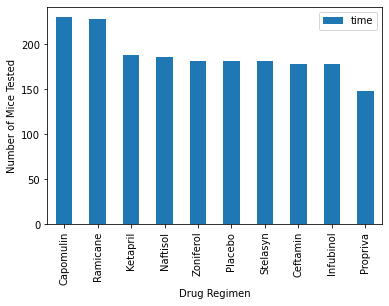

In [436]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_num = mouse_df_clean.groupby(['Drug'])
# timepoint_num.head()
stat_labels = pd.DataFrame(timepoint_num['time'].count())
stat_labels.reset_index()
stat_labels_sort = stat_labels.sort_values(by='time', ascending=False)
stat_labels_sort
# drug_labels['Drug'] = timepoint_num[['Drug']]
# drug_labels.head(20)
stat_labels.to_csv('labels_check.csv')
drug_list = list(stat_labels_sort.index.values)
stat_labels_sort.plot(kind='bar', figsize=(6,4))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

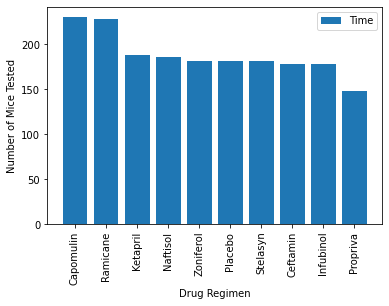

In [437]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x=stat_labels_sort.index, height=stat_labels_sort['time'], 
                                                align='center')
plt.xticks(rotation=90)
plt.legend(['Time'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show

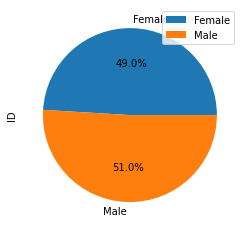

In [438]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = mouse_df_clean.groupby(['Sex'])['ID']
gender.nunique()
gender = pd.DataFrame(round(gender.count(),2))
gender.plot(kind='pie', subplots=True, autopct="%1.1f%%")
plt.show()



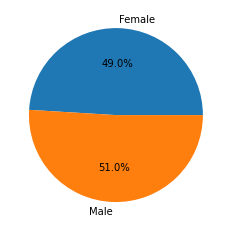

In [439]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index
sizes = gender['ID']
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [440]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# mouse_group = mouse_df_clean.groupby(mouse_df_clean['ID'])
big_tumor = mouse_df_clean.nlargest(mouse_df_clean['ID'].nunique(),['time'])
big_tumor.to_csv('drug_count.csv')
big_tumor['Drug'].value_counts().sum()
big_tumor.dtypes
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


ID             object
Drug           object
Sex            object
Age_months      int64
Wt              int64
time            int64
tvolume       float64
sites           int64
dtype: object

In [441]:
# My Code

Infubinol = big_tumor.loc[big_tumor["Drug"] == 'Infubinol', 'tvolume']
Capomulin = big_tumor.loc[big_tumor["Drug"] == 'Capomulin', 'tvolume']
Ramicane = big_tumor.loc[big_tumor["Drug"] == 'Ramicane', 'tvolume']
Ceftamin = big_tumor.loc[big_tumor["Drug"] == 'Ceftamin', 'tvolume']

Ramicane.sort_values()
# plt.boxplot(Ceftamin)

# # fig1, ax1 = plt.subplots()
# # ax1.boxplot(new_calc)
# plt.show()


9      22.050126
8      24.365505
49     29.128472
59     30.276232
74     30.564625
84     30.638696
93     31.001861
114    31.095335
48     31.369406
94     31.560470
58     32.798171
153    32.833189
174    32.978522
154    33.397653
184    33.562402
83     34.022093
113    34.954733
73     35.114575
193    35.501190
183    35.557933
173    35.779451
194    36.134852
254    36.374510
233    36.520033
234    37.225650
272    37.311236
213    38.259725
271    38.265404
327    38.407618
214    38.810366
326    40.258818
253    40.442370
400    40.659006
410    40.667713
429    42.504926
430    43.047543
409    43.453687
399    44.006724
419    44.471821
420    45.220869
Name: tvolume, dtype: float64

In [442]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [443]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = big_tumor.loc[big_tumor["Drug"] == drug, 'tvolume']
    # tumor_volume.dtype
    # add subset 
    tumor_list.append(tumor_volume)
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Outliers for {drug} : {outliers}")


Outliers for Capomulin : Series([], Name: tvolume, dtype: float64)
Outliers for Ramicane : 9    22.050126
Name: tvolume, dtype: float64
Outliers for Infubinol : Series([], Name: tvolume, dtype: float64)
Outliers for Ceftamin : Series([], Name: tvolume, dtype: float64)


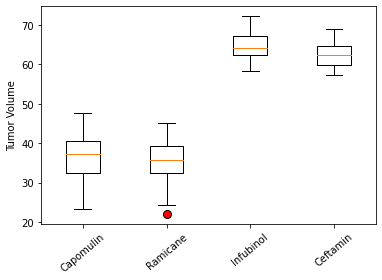

In [457]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_dict = dict(markerfacecolor='red',markersize=8)
plt.boxplot(tumor_list, labels = treatments, flierprops=boxplot_dict,widths=(.4))
plt.xticks(rotation = 40)
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

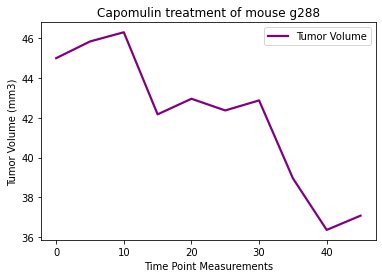

In [445]:
capomulin_df = mouse_df_clean.loc[mouse_df_clean['Drug'] == 'Capomulin']
rand_mouse = capomulin_df.sample(n = 1)['ID']
rand_id = rand_mouse.iloc[0]
one_mouse = mouse_df_clean.loc[mouse_df_clean['ID'] == rand_id][['time', 'tvolume']]
one_mouse = one_mouse.set_index(['time'])
plt.plot(one_mouse, color='purple', label='Tumor Volume per Timepoint', linewidth=2.2)
plt.legend(['Tumor Volume'], loc='upper right')
plt.title(f'Capomulin treatment of mouse {rand_id}')
plt.xlabel('Time Point Measurements')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


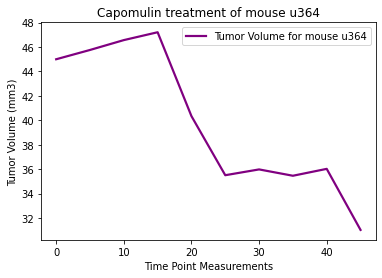

In [446]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# rand_mouse = mouse_df_clean.sample(n = 1)
capomulin_df = mouse_df_clean.loc[mouse_df_clean['Drug'] == 'Capomulin']
rand_mouse = capomulin_df.sample(n = 1)['ID']
rand_id = rand_mouse.iloc[0]
one_mouse = mouse_df_clean.loc[mouse_df_clean['ID'] == rand_id][['time', 'tvolume']]
one_mouse = one_mouse.set_index(['time'])
plt.plot(one_mouse, color='purple', label='Tumor Volume per Timepoint', linewidth=2.2)
plt.legend([f'Tumor Volume for mouse {rand_id}'], loc='best')
plt.title(f'Capomulin treatment of mouse {rand_id}')
plt.xlabel(f'Time Point Measurements')
plt.ylabel(f'Tumor Volume (mm3)')
plt.show()

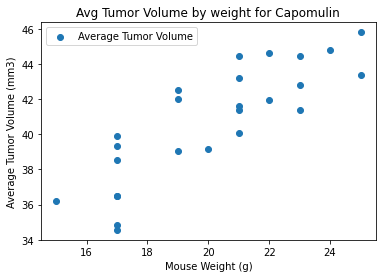

In [447]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_wt_capomulin = mouse_df_clean.loc[mouse_df_clean['Drug'] == 'Capomulin']
avg_tumor_capomulin = mouse_wt_capomulin.groupby(['ID']).mean()
plt.scatter(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
plt.title('Avg Tumor Volume by weight for Capomulin')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

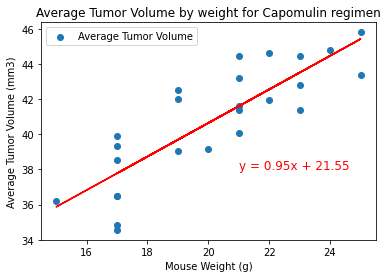

The correlation between mouse weight and the average tumor volume is 0.84


In [454]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

slope, inter, rvalue, pvalue, stderr = st.linregress(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
regress_values = avg_tumor_capomulin['Wt'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
plt.plot(avg_tumor_capomulin['Wt'],regress_values,"r-")
plt.annotate(line_eq, (21, 38), fontsize=12, color="red")
plt.title('Average Tumor Volume by weight for Capomulin regimen')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
